In [1]:
!pip install pandas seaborn matplotlib scikit-learn datasets[vision]

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import datasets
import numpy as np

In [11]:
data = datasets.load_from_disk('../datasets/eva02_base_test')
y_true = data['genre']

In [14]:

y_pred = np.load('../out/y_pred/eva02_base_genre_y_pred_balanced.npy')

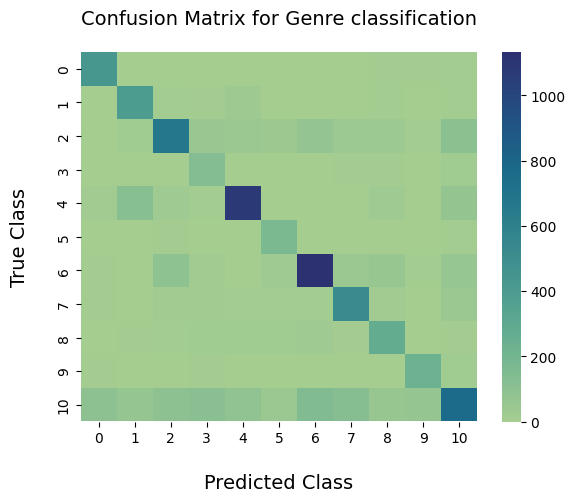

In [19]:
from sklearn.metrics import confusion_matrix

# do percentage-wise confusion matrix! error shines more through for the small classes

# Order of the input parameters is important: 
# first param is the actual output values
# second param is what our model predicted

conf_matrix = confusion_matrix(y_true, y_pred)

ax = sn.heatmap(conf_matrix, cmap='crest')
ax.set_xlabel("Predicted Class", fontsize=14, labelpad=20)
ax.set_ylabel("True Class", fontsize=14, labelpad=20)
ax.set_title("Confusion Matrix for Genre classification", fontsize=14, pad=20)
plt.show()

In [9]:
np.save('array.npy', array)

In [10]:
hej = np.load('array.npy')

In [12]:
pip install datasets[vision]

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 2.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 8.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 2.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 1.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 43.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 25.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 1.0 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 12.9 MB/s eta 

In [14]:
import datasets

In [24]:
import os
ds_train = datasets.load_from_disk(os.path.join("..", "datasets", 'eva02_base_train'))
ds_train = ds_train[0:100]
ds_train.save_to_disk(os.path.join('..', 'datasets', "plott_test_train"))


AttributeError: 'dict' object has no attribute 'save_to_disk'

In [26]:
type(ds_train)

dict

In [23]:
ds_val = datasets.load_from_disk(os.path.join("..", "datasets", 'eva02_base_val'))
ds_val = ds_val[0:100]
ds_val.save_to_disk(os.path.join('..', 'datasets', "plott_test_val"))

AttributeError: 'dict' object has no attribute 'save_to_disk'

In [22]:
ds_test = datasets.load_from_disk(os.path.join("..", "datasets", 'eva02_base_test'))
ds_test = ds_test[0:100]
ds_test.save_to_disk(os.path.join('..', 'datasets', "plott_test_test"))

100

In [ ]:
def fit_and_predict(train_data, test_data, val_data, hidden_layer_size, embedding_col, feature_col, batch_size, epochs):

    '''fit a compiled model on training data and predict on test dataset'''

    model = build_classfication_model(train_data, hidden_layer_size, feature_col, embedding_col)

    # convert to tensorflow datasets
    tf_ds_train = train_data.to_tf_dataset(
            columns=embedding_col, # the columns to be used as inputs to the model, X
            label_cols=feature_col, # columns containing class labels, y
            batch_size=batch_size,
            shuffle=True
            )
    
    tf_ds_test = test_data.to_tf_dataset(
            columns=embedding_col,
            label_cols=feature_col, 
            batch_size=batch_size,
            shuffle=False # for test data, set shuffle to false
            )
    
    tf_ds_val = val_data.to_tf_dataset(
            columns=embedding_col,
            label_cols=feature_col, 
            batch_size=batch_size,
            shuffle=False # ?
            )

    # define steps per epoch
    #epoch_steps = (len(train_data) // batch_size) -1
    #print(epoch_steps)

    # add early stopping, stop training if validation loss does not improve for three epochs
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

    # start timer
    start_time = time.time()

    # fit model and save history
    H = model.fit(tf_ds_train, epochs = epochs, validation_data=tf_ds_val, callbacks=[early_stopping])

    end_time = time.time() - start_time

    # save time as txt
    with open(f"out/times/{embedding_col}_{feature_col}_training_l2.txt", "w") as f:
       f.write(str(end_time))

    num_epochs= len(H.history['val_loss'])
    print(f"Model ran for {num_epochs} epochs")

    # save history plot in "plots" folder
    save_plot_history(H, num_epochs, f'{embedding_col}_{feature_col}_history_l2.png')

    # predict on test data
    predictions = model.predict(tf_ds_test)

    # find class with the highest probability
    predicted_classes = np.argmax(predictions,axis=1)

    # save predicted classes as .npy to be used for plotting
    np.save(f'out/y_pred/{embedding_col}_{feature_col}_y_pred.npy', predicted_classes)

    return predicted_classes

In [1]:
pip install datasets[vision]

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import datasets

In [3]:
ds_eva = datasets.load_from_disk('../datasets/eva02_large_train')
ds_conv = datasets.load_from_disk('../datasets/convnextv2_huge_train')
ds_art = datasets.load_from_disk('../datasets/conv_clip_laiona_train')

In [4]:
len(ds_eva[0]['eva02_large'])

1024

In [4]:
hej = ds_eva[0]['eva02_large']

In [5]:
hej

[-0.16497556865215302,
 0.36406710743904114,
 -0.3222414553165436,
 -0.20049184560775757,
 -0.052063312381505966,
 -0.7697170972824097,
 0.21990370750427246,
 0.534977912902832,
 -0.17256172001361847,
 0.21186064183712006,
 -0.03176364302635193,
 -1.4621340036392212,
 -0.0016798533033579588,
 -0.8522707223892212,
 0.028570963069796562,
 0.14519229531288147,
 -1.8268402814865112,
 -0.29150575399398804,
 0.06095375865697861,
 0.197983980178833,
 -0.19816674292087555,
 -0.6224467158317566,
 0.9234232902526855,
 -0.0961918979883194,
 -1.7291308641433716,
 1.7221992015838623,
 -0.5482838153839111,
 -0.37573251128196716,
 -1.321921467781067,
 0.3337462842464447,
 0.3545660376548767,
 0.23554101586341858,
 -0.8941682577133179,
 -0.1571630984544754,
 1.0849546194076538,
 -3.2165231704711914,
 -0.45059219002723694,
 0.3200547397136688,
 -0.40158161520957947,
 0.19605542719364166,
 0.8439498543739319,
 -0.8160938024520874,
 -1.0553840398788452,
 1.7969859838485718,
 -0.18365013599395752,
 0.7450

In [6]:
len(hej)

1024

In [3]:
y_pred = np.load('../out/y_pred/convnextv2_huge_genre_y_pred.npy')

In [4]:
y_pred.shape

(8145,)

In [7]:
y_pred

array([10, 10, 10, ...,  6,  4,  6])

In [5]:
y_pred_other = np.load('../out/y_pred/eva02_large_genre_y_pred.npy')

In [10]:
# 5 
np.unique(y_pred)

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10])

In [21]:
ds_conv = datasets.load_from_disk('../datasets/convnextv2_huge_test')
y_true = ds_conv['genre']

In [22]:
indices = [index for index, value in enumerate(y_true) if value == 5]

In [23]:
indices

[18,
 26,
 29,
 76,
 193,
 203,
 208,
 302,
 344,
 355,
 450,
 471,
 481,
 632,
 635,
 638,
 681,
 694,
 758,
 848,
 901,
 919,
 1165,
 1183,
 1261,
 1278,
 1308,
 1407,
 1510,
 1512,
 1605,
 1661,
 1691,
 1716,
 1763,
 1782,
 1786,
 1811,
 1935,
 1948,
 1979,
 2012,
 2021,
 2059,
 2094,
 2150,
 2221,
 2241,
 2286,
 2375,
 2402,
 2423,
 2429,
 2463,
 2507,
 2529,
 2578,
 2622,
 2633,
 2643,
 2768,
 2770,
 2783,
 2813,
 2840,
 2852,
 2892,
 2896,
 2963,
 3083,
 3120,
 3144,
 3261,
 3286,
 3326,
 3483,
 3514,
 3540,
 3542,
 3561,
 3649,
 3650,
 3689,
 3731,
 3741,
 3815,
 3846,
 3864,
 3875,
 3888,
 3892,
 3924,
 3936,
 3963,
 4003,
 4051,
 4080,
 4115,
 4117,
 4165,
 4233,
 4275,
 4285,
 4287,
 4335,
 4374,
 4375,
 4405,
 4406,
 4439,
 4502,
 4547,
 4590,
 4607,
 4613,
 4663,
 4664,
 4696,
 4697,
 4745,
 4789,
 4832,
 4843,
 4849,
 4853,
 4858,
 4867,
 4942,
 4948,
 5083,
 5085,
 5146,
 5148,
 5181,
 5225,
 5240,
 5339,
 5414,
 5454,
 5508,
 5554,
 5562,
 5574,
 5696,
 5742,
 5756,
 578

In [24]:
y_pred[indices]

array([ 2,  2,  6,  2,  6, 10,  6,  6, 10,  6,  6, 10,  6,  6,  7, 10,  2,
        7,  6,  6,  6,  2, 10,  6,  6, 10, 10, 10,  6,  6,  6,  6, 10,  6,
        6,  6,  6,  6, 10,  6,  6, 10,  6,  8,  6,  8,  2, 10,  6,  2,  6,
       10, 10,  2,  6,  6,  6,  6, 10,  8,  6,  6, 10, 10,  6,  6,  6,  6,
        6, 10,  7,  6, 10,  6, 10, 10,  6,  2,  0, 10,  6,  6, 10,  6,  6,
        6,  6,  6,  6,  6,  7,  8,  6, 10,  6,  6,  6,  6,  4,  6,  6, 10,
        6,  6,  6, 10,  6,  6,  2,  6,  2,  6,  6,  6,  7,  6, 10, 10,  6,
        2, 10,  6, 10,  6,  6,  6,  6,  7,  6,  6,  2,  2,  6,  8, 10,  6,
        6, 10, 10,  6,  6,  4,  6,  8,  6,  6, 10, 10,  6,  8, 10,  8,  7,
       10, 10,  6,  6,  2,  6, 10,  2,  6, 10,  6,  6,  6,  6,  6,  2,  6,
        6,  8,  6,  6,  6,  6,  6, 10,  3,  6,  6,  6,  6,  6, 10,  6,  6,
       10,  8,  2,  6,  6,  6, 10, 10,  8,  2,  6])